In [9]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [10]:
state = State(R=1000,
              L=0,
              E=0,
              V=0.00000004)

,values
R,1.000000e+03
L,0.000000e+00
E,0.000000e+00
V,4.000000e-08


In [24]:
system = System(gamma = 1.36, #cells per day, 
                mu = 0.00136, #cells per day,
                tau = 0.2, #fraction of cells per day,
                beta = 0.00027, #infections per viron,
                rho = 0.1, #fraction of cells per day,
                alpha = 0.036, #virons per day,
                sigma = 2, #cells per day,
                delta = 0.33, #cells per day,
                pi = 100, #virons per day,
                t0 = 0,
                t_end = 120,
                dt = 1/24
               )

,values
gamma,1.360000
mu,0.001360
tau,0.200000
beta,0.000270
rho,0.100000
alpha,0.036000
sigma,2.000000
delta,0.330000
pi,100.000000
t0,0.000000


In [25]:
def R_change(state,system):
    unpack(system)
    unpack(state)
    rateR = ((gamma * tau) - (mu * R) - (beta * R * V)) * dt
    return rateR

def L_change(state,system):
    unpack(system)
    unpack(state)
    rateL = ((rho * beta * R * V) - (mu * L) - (alpha * L)) * dt
    return rateL

def E_change(state,system):
    unpack(system)
    unpack(state)
    rateE = (((1 - rho) * beta * R * V) + (alpha * L) - (delta * E)) * dt
    return rateE

def V_change(state,system):
    unpack(system)
    unpack(state)
    rateV = ((pi * E) - (sigma * V)) * dt
    return rateV



In [45]:
##Didn't work right, staright line for R
def update_func(system,state):
    state.R = state.R + R_change(state,system)
    state.L = state.L + L_change(state,system) 
    state.E = state.E + E_change(state,system)
    state.V = state.V + V_change(state,system) 
    return State(R = R, L = L , E = E, V = V)

In [46]:
def update_func_expand(system, state):
    unpack(system)
    
    state.R += ((gamma * tau) - (mu * state.R) - (beta * state.R * state.V)) * dt
    state.L += ((rho * beta * state.R * state.V) - (mu * state.L) - (alpha * state.L)) * dt
    state.E += (((1 - rho) * beta * state.R * state.V) + (alpha * state.L) - (delta * state.E)) * dt
    state.V += ((pi * state.E) - (sigma * state.V)) * dt
    return State(R = state.R, L = state.L , E = state.E, V = state.V)

In [47]:
def run_simulation(system, state, update_func):
    frame = TimeFrame(columns = state.index)
    frame.row[system.t0] = state 
    
    for t in linrange(system.t0, system.t_end,system.dt):
        frame.row[t + system.dt] = update_func(system, frame.row[t])
        
    return frame

In [48]:
run_simulation(system, state, update_func_expand)

,R,L,E,V
0.000000,1000.000000,0.000000e+00,0.000000e+00,4.000000e-08
0.041667,999.954667,4.499796e-11,4.050491e-10,3.835437e-08
0.083333,999.909336,8.807267e-11,7.879146e-10,3.844115e-08
0.125000,999.864008,1.311760e-10,1.166441e-09,4.009789e-08
0.166667,999.818682,1.760737e-10,1.556584e-09,4.324217e-08
0.208333,999.773359,2.244361e-10,1.973246e-09,4.786051e-08
0.250000,999.728039,2.779151e-10,2.430986e-09,5.400125e-08
0.291667,999.682721,3.382146e-10,2.944657e-09,6.177055e-08
0.333333,999.637405,4.071548e-10,3.529979e-09,7.133125e-08
0.375000,999.592092,4.867359e-10,4.204106e-09,8.290408e-08


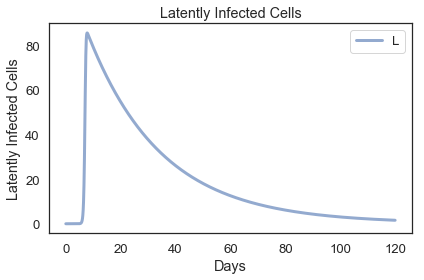

In [49]:
data = run_simulation(system, state, update_func_expand)

plot(data.index, data['L'], label = 'L')

decorate(xlabel='Days',
         ylabel='Latently Infected Cells',
         title = 'Latently Infected Cells')

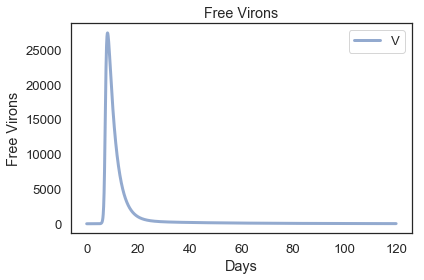

In [50]:
plot(data.index, data['V'], label = 'V')

decorate(xlabel='Days',
         ylabel='Free Virons',
         title = 'Free Virons')

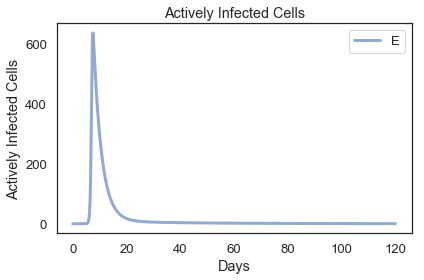

In [51]:
plot(data.index, data['E'], label = 'E')

decorate(xlabel='Days',
         ylabel='Actively Infected Cells',
         title = 'Actively Infected Cells')

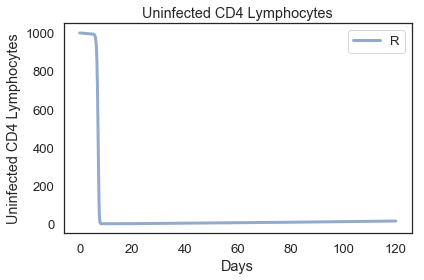

In [55]:
plot(data.index, data['R'], label = 'R')

decorate(xlabel='Days',
         ylabel='Uninfected CD4 Lymphocytes',
         title = 'Uninfected CD4 Lymphocytes')